**Лабораторная работа №2**

***Глобальная оптимизация***

**Задание:**

1) Развернуть и протестировать работу pygmo

2) Найти оптимумы тестовых функций лабы 1 с помощью двух алгоритмов этой библиотеки

3) Сконструировать нефункциональную(алгоритмическую) проблему оптимизации и решить в pygmo

Загрузим модули

In [42]:
!pip install pygmo
import math
from typing import Tuple, Mapping

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import numpy as np
from numpy import random

# Загрузим pigmo
import pygmo as pg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Функция Химмельблау**

In [43]:
#функция 1
class HimmelblauOptimization:

    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float):

        # Задайте входные аргументы в качестве атрибутов, представляющих границы 
        # задачи для обеих проектных переменных
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x):
        # Вычислить значение функции
        function_value = math.pow(x[0] * x[0] + x[1] - 11.0, 2.0) + math.pow(x[0] + x[1] * x[1] - 7.0, 2.0)

        # Вернуть список
        return [function_value]

Инициализация UDP и создание объекта pygmo

In [44]:
udp = HimmelblauOptimization(-5.0, 5.0, -5.0, 5.0)
prob = pg.problem(udp)
print(prob)

Problem name: <class '__main__.HimmelblauOptimization'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [5, 5]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



Создадим объекты, выведем информацию об алгоритме

In [45]:
number_of_generations = 1
current_seed = 171015
de_algo = pg.de(gen=number_of_generations, seed=current_seed)
algo = pg.algorithm(de_algo)
print(algo)

Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: pagmo::de

	Thread safety: basic

Extra info:
	Generations: 1
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 171015


Создадим и изучим популяцию

In [46]:
pop_size = 1000
pop = pg.population(prob, size=pop_size, seed=current_seed)
inspect_pop = False
if inspect_pop:
    print(pop)

Произведем эволюцию и выведем лучшие образцы

In [47]:
number_of_evolutions = 100

individuals_list = []
fitness_list = []

for i in range(number_of_evolutions):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])

print('\nДАННЫЕ О ЧЕМПИОНЕ\n')
print('Fitness (= function) value: ', pop.champion_f)
print('Decision variable vector: ', pop.champion_x)
print('Number of function evaluations: ', pop.problem.get_fevals())
print('Difference wrt the minimum: ', pop.champion_x - np.array([3,2]))


ДАННЫЕ О ЧЕМПИОНЕ

Fitness (= function) value:  [7.00291849e-11]
Decision variable vector:  [3.00000121 2.00000049]
Number of function evaluations:  101000
Difference wrt the minimum:  [1.20908045e-06 4.90222241e-07]


Выведем лучший образец

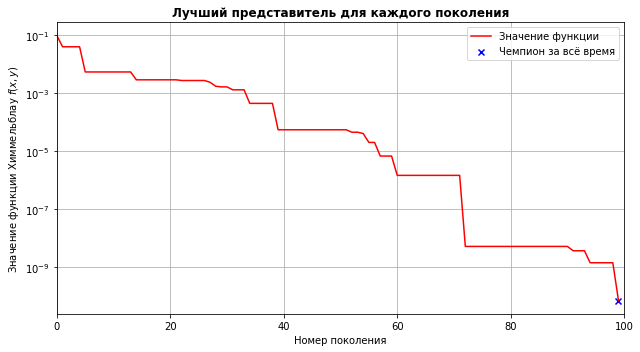

In [48]:
# Вытащим лучших индивидов из всех поколений
best_x = [ind[0] for ind in individuals_list]
best_y = [ind[1] for ind in individuals_list]

# Выразим границы задачи
(x_min, y_min), (x_max, y_max) = udp.get_bounds()

# Изобразим минимизацию за все поколения
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, number_of_evolutions), fitness_list, label='Значение функции', color='red')

# Выведем лучший образец
champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='blue', label='Чемпион за всё время')

# Оформление
ax.set_xlim((0, number_of_evolutions))
ax.grid('major')
ax.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax.set_xlabel('Номер поколения')
ax.set_ylabel(r'Значение функции Химмельблау $f(x,y)$')
ax.legend(loc='upper right')
ax.set_yscale('log')
plt.tight_layout()

# Показ
plt.show()

Функция Химмельблау

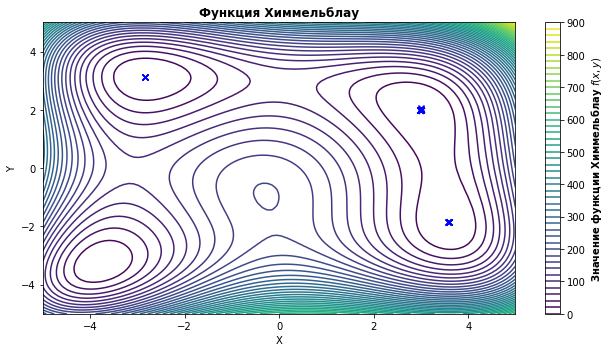

In [49]:
grid_points = 100
x_vector = np.linspace(x_min, x_max, grid_points)
y_vector = np.linspace(y_min, y_max, grid_points)
x_grid, y_grid = np.meshgrid(x_vector, y_vector)
z_grid = np.zeros((grid_points, grid_points))
for i in range(x_grid.shape[1]):
    for j in range(x_grid.shape[0]):
        z_grid[i, j] = udp.fitness([x_grid[i, j], y_grid[i, j]])[0]

fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(x_grid, y_grid, z_grid, 50)

ax.scatter(best_x, best_y, marker='x', color='blue')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
ax.set_title('Функция Химмельблау', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r'Значение функции Химмельблау $f(x,y)$', fontweight='bold')
plt.tight_layout()

plt.show()

Функция Комрика

In [50]:
class  McComrickOptimization:

    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float):

        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x):
        function_value = math.sin(x[0] + x[1]) + math.pow(x[0] - x[1], 2.0) - 1.5*x[0] + 2.5*x[1]+1 +2 #чтобы график работал

        return [function_value]

Инициализация UDP и создание объекта pygmo

In [51]:
udp = McComrickOptimization(-1.5, 4.0, -3.0, 4.0)

prob = pg.problem(udp)

print(prob)

Problem name: <class '__main__.McComrickOptimization'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-1.5, -3]
	Upper bounds: [4, 4]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



Создадим объекты, выведем информацию об алгоритме

In [52]:
number_of_generations = 1

current_seed = 171015

de_algo = pg.de(gen=number_of_generations, seed=current_seed)

algo = pg.algorithm(de_algo)

print(algo)

Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: pagmo::de

	Thread safety: basic

Extra info:
	Generations: 1
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 171015


Создадим и изучим популяцию

In [53]:
pop_size = 1000

pop = pg.population(prob, size=pop_size, seed=current_seed)

inspect_pop = False
if inspect_pop:
    print(pop)

Произведем эволюцию и выведем лучшие образцы

In [54]:
number_of_evolutions = 100

individuals_list = []
fitness_list = []

for i in range(number_of_evolutions):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])

print('\n ДАННЫЕ О ЧЕМПИОНЕ \n')
print('Fitness (= function) value: ', pop.champion_f)
print('Decision variable vector: ', pop.champion_x)
print('Number of function evaluations: ', pop.problem.get_fevals())
print('Difference wrt the minimum: ', pop.champion_x - np.array([3,2]))


 ДАННЫЕ О ЧЕМПИОНЕ 

Fitness (= function) value:  [0.08677705]
Decision variable vector:  [-0.54719756 -1.54719756]
Number of function evaluations:  101000
Difference wrt the minimum:  [-3.54719756 -3.54719756]


Выведем лучший образец

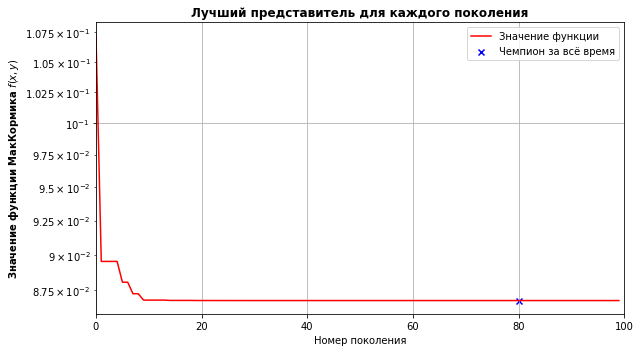

In [55]:
best_x = [ind[0] for ind in individuals_list]
best_y = [ind[1] for ind in individuals_list]

(x_min, y_min), (x_max, y_max) = udp.get_bounds()

fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, number_of_evolutions), fitness_list, label='Значение функции', color = 'red')

champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='blue', label='Чемпион за всё время')

ax.set_xlim((0, number_of_evolutions))
ax.grid('major')
ax.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax.set_xlabel('Номер поколения')
ax.set_ylabel(r'Значение функции МакКормика $f(x,y)$', fontweight='bold')
ax.legend(loc='upper right')
ax.set_yscale('log')
plt.tight_layout()

plt.show()

Функция Комрика

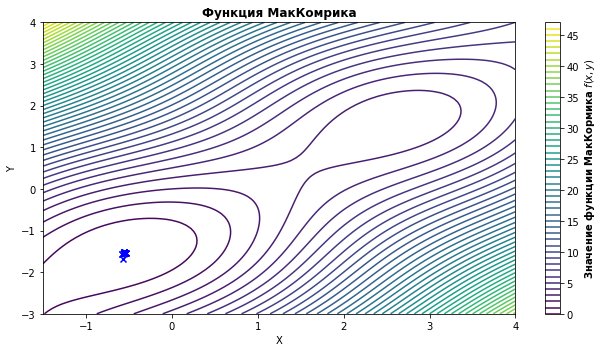

In [56]:
grid_points = 100
x_vector = np.linspace(x_min, x_max, grid_points)
y_vector = np.linspace(y_min, y_max, grid_points)
x_grid, y_grid = np.meshgrid(x_vector, y_vector)
z_grid = np.zeros((grid_points, grid_points))
for i in range(x_grid.shape[1]):
    for j in range(x_grid.shape[0]):
        z_grid[i, j] = udp.fitness([x_grid[i, j], y_grid[i, j]])[0]

fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(x_grid, y_grid, z_grid, 50)

ax.scatter(best_x, best_y, marker='x', color='blue')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
ax.set_title('Функция МакКомрика', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r'Значение функции МакКормика $f(x,y)$', fontweight='bold')
plt.tight_layout()

plt.show()

**Нефункциональная (алгоритмическая) проблема (Задача о рюкзаке)**

In [57]:
class Rucksack():
  def __init__(self, weight, cost, limit_weight):
    self.dim = len(cost)
    self.weight = weight
    self.cost = cost
    self.limit_weight = limit_weight

  def get_bounds(self):
    return (np.full((self.dim,), 0), np.full((self.dim,), 1))

  def fitness(self, x):
    result, limitation = np.zeros((1,)), np.zeros((1,))
    for i in range(self.dim):
      round_x = round(x[i])
      result[0] += round_x * self.cost[i]
      limitation[0] += round_x * self.weight[i]
    if (limitation[0] > self.limit_weight):
      return np.zeros((1,))
    else:
      return -result
     

In [58]:
generation_count = 5
population_count = 2

cost = [17, 17, 17, 30, 30, 30, 75, 75, 75] #массив значений ценности вещей
weight = [1.5, 1.5, 1.5, 2.5, 2.5, 2.5, 6, 6, 6] #массив значений занимаемого места
limit_weight = 20 #ограничение по вместимости рюкзака
res = np.zeros(generation_count * population_count)
for i in range(1, generation_count + 1):
  for j in range(2, population_count + 2):
      algo = pg.algorithm(pg.bee_colony(gen = i))
      prob = pg.problem(Rucksack(weight, cost, limit_weight))
      pop = pg.population(prob, j)
      pop = algo.evolve(pop)
      res[(i-1) * population_count + (j-2)] = -pop.champion_f[0]
      print((("Поколение = {i}, численность популяции = {j}, результат = {res}").format(i=i, j=j, res=-pop.champion_f[0])))
  print("\n")
     

Поколение = 1, численность популяции = 2, результат = 214.0
Поколение = 1, численность популяции = 3, результат = 244.0


Поколение = 2, численность популяции = 2, результат = 244.0
Поколение = 2, численность популяции = 3, результат = 225.0


Поколение = 3, численность популяции = 2, результат = 244.0
Поколение = 3, численность популяции = 3, результат = 244.0


Поколение = 4, численность популяции = 2, результат = 227.0
Поколение = 4, численность популяции = 3, результат = 240.0


Поколение = 5, численность популяции = 2, результат = 244.0
Поколение = 5, численность популяции = 3, результат = 227.0




Выведем изображение

In [59]:
import plotly.graph_objects as go
result = []
for i in range(1, generation_count + 1):
  result.append(go.Scatter3d(name=i, x=np.ones(generation_count)*i, y=np.arange(2, population_count + 2), z=res[(i-1)*2 : i*2], mode='markers', hovertemplate="Поколение=%{x}Особей в популяции=%{y}"))

fig = go.Figure(data=result)
fig.update_layout(legend_title_text = "Поколения:")
fig.show()